In [22]:
import pandas as pd
import chess
import chess.pgn
import io



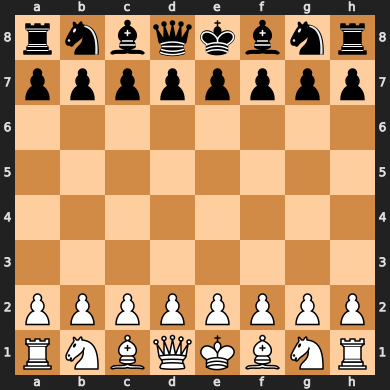

In [2]:
board = chess.Board()
board.legal_moves
board

In [30]:
#games = open('games_short.pgn', encoding='utf-8')
df = pd.DataFrame(columns=['Opening', 'Result'])
games = open('lichess_elite_2020-06.pgn')
for k in range(20000) :
   game = chess.pgn.read_game(games)
   print(game.headers['Opening'], game.headers['Result'])
   df.loc[len(df.index)] = [game.headers['Opening'],  game.headers['Result']]




mapping = {'1-0' : 1, '1/2-1/2' :0, '0-1' : -1}
df.Result = df.Result.map(mapping)

print(df)


French Defense: Winawer Variation, Poisoned Pawn Variation 1/2-1/2
Sicilian Defense 1-0
Modern Defense: Standard Line 1/2-1/2
Queen's Gambit Declined 0-1
Dutch Defense: Semi-Leningrad Variation 1-0
Caro-Kann Defense: Two Knights Attack 0-1
Sicilian Defense: French Variation, Westerinen Attack 1-0
Nimzowitsch Defense: Williams Variation 0-1
French Defense: Advance Variation 0-1
King's Indian Defense: Orthodox Variation, Glek Defense 0-1
Queen's Pawn Game: Krause Variation 0-1
King's Indian Defense: Normal Variation 1-0
French Defense: Classical Variation, Steinitz Variation 0-1
Scotch Game: Classical Variation, Intermezzo Variation 1-0
Queen's Pawn Game: London System 1-0
Scandinavian Defense: Mieses-Kotroc Variation 1-0
Trompowsky Attack 1/2-1/2
Italian Game: Scotch Gambit, Nakhmanson Gambit 0-1
French Defense: Winawer Variation, Winckelmann-Riemer Gambit 1-0
King's Gambit Accepted, Schallopp Defense 0-1
Czech Defense 1/2-1/2
Semi-Slav Defense 0-1
French Defense: Tarrasch Variation, Ch

In [31]:
df.loc[(df.Opening == 'Sicilian Defense') & (df.Result == 1) ]

,Opening,Result
1,Sicilian Defense,1.0
2262,Sicilian Defense,1.0
2296,Sicilian Defense,1.0
2722,Sicilian Defense,1.0
3262,Sicilian Defense,1.0
...,...,...
18486,Sicilian Defense,1.0
18570,Sicilian Defense,1.0
19597,Sicilian Defense,1.0
19829,Sicilian Defense,1.0


In [32]:

openings = df.Opening.unique()
openings
list = []
for opening in openings :
    list.append([opening,len(df.loc[(df.Opening == opening) & (df.Result == 1)]), len(df.loc[(df.Opening == opening) & (df.Result == 0)]), len(df.loc[(df.Opening == opening) & (df.Result == -1)])])

list
#df.value_counts('Opening')


[['French Defense: Winawer Variation, Poisoned Pawn Variation', 12, 3, 5],
 ['Sicilian Defense', 73, 14, 53],
 ['Modern Defense: Standard Line', 22, 11, 28],
 ["Queen's Gambit Declined", 33, 4, 24],
 ['Dutch Defense: Semi-Leningrad Variation', 1, 1, 2],
 ['Caro-Kann Defense: Two Knights Attack', 41, 15, 24],
 ['Sicilian Defense: French Variation, Westerinen Attack', 14, 2, 8],
 ['Nimzowitsch Defense: Williams Variation', 12, 3, 6],
 ['French Defense: Advance Variation', 11, 4, 10],
 ["King's Indian Defense: Orthodox Variation, Glek Defense", 12, 1, 12],
 ["Queen's Pawn Game: Krause Variation", 5, 1, 8],
 ["King's Indian Defense: Normal Variation", 20, 3, 14],
 ['French Defense: Classical Variation, Steinitz Variation', 11, 4, 11],
 ['Scotch Game: Classical Variation, Intermezzo Variation', 3, 1, 2],
 ["Queen's Pawn Game: London System", 50, 16, 57],
 ['Scandinavian Defense: Mieses-Kotroc Variation', 44, 8, 53],
 ['Trompowsky Attack', 97, 19, 83],
 ['Italian Game: Scotch Gambit, Nakhman

Ici, on ne retient que l'ouverture générale

In [37]:
df2 = df.copy()
df2.Opening = df2.Opening.apply(lambda x : x[0:1+x.find(":")])
openings = df2.Opening.unique()

list = []
for opening in openings :
    if opening != '' :
       n = len(df2.loc[df2.Opening == opening])
       list.append([opening,len(df2.loc[df2.Opening == opening]),len(df2.loc[(df2.Opening == opening) & (df2.Result == 1)])/n, len(df2.loc[(df2.Opening == opening) & (df2.Result == 0)])/n, len(df2.loc[(df2.Opening == opening) & (df2.Result == -1)])/n])

Results_df = pd.DataFrame(columns = ['Opening', 'Number of games', 'White wins', 'Draw', 'Black wins'])

for opening in list :
    Results_df.loc[len(Results_df.index)] = [opening[0], opening[1], str(100*round(opening[2],4)) + '%', str(100*round(opening[3],4)) + '%', str(100*round(opening[4],4)) + '%']

Results_df
    



,Opening,Number of games,White wins,Draw,Black wins
0,French Defense:,1122,46.08%,10.34%,43.580000000000005%
1,Modern Defense:,333,44.440000000000005%,8.41%,47.15%
2,Dutch Defense:,143,47.55%,11.89%,40.56%
3,Caro-Kann Defense:,857,47.49%,10.85%,41.660000000000004%
4,Sicilian Defense:,3514,47.27%,9.22%,43.480000000000004%
...,...,...,...,...,...
71,Petrov:,1,100.0%,0.0%,0.0%
72,Owen Defense:,1,100.0%,0.0%,0.0%
73,London System:,1,100.0%,0.0%,0.0%
74,Rubinstein Opening:,1,100.0%,0.0%,0.0%
